In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [2]:
tDF = pd.read_csv('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/T2T_spacerBlock_DYZ1_regions.tsv', sep='\t', header=None, names=['DYZ1_Block','Start','Stop']).set_index("DYZ1_Block")
DYZ1_blockNames = []
headerDict = {}
for row in tDF.index:
    DYZ1_blockNames.append(row)
    headerDict["chrY:"+str(tDF.at[row,'Start'])+"-"+str(tDF.at[row,'Stop'])] = row
headerDict

{'chrY:27617733-28660072': 0,
 'chrY:28686561-29200664': 1,
 'chrY:29239365-29320749': 2,
 'chrY:29356078-30970139': 3,
 'chrY:31197828-31849721': 4,
 'chrY:32018112-32840468': 5,
 'chrY:33089758-33304728': 6,
 'chrY:33544623-34543993': 7,
 'chrY:35727722-36090297': 8,
 'chrY:36170541-36446094': 9,
 'chrY:36601339-36962294': 10,
 'chrY:37064475-37332506': 11,
 'chrY:37586847-38042674': 12,
 'chrY:38272788-38635462': 13,
 'chrY:38727801-39006877': 14,
 'chrY:39169386-39473474': 15,
 'chrY:39590173-39897295': 16,
 'chrY:40183036-40686700': 17,
 'chrY:41531225-42579142': 18,
 'chrY:43446246-43798096': 19,
 'chrY:43921863-44190149': 20,
 'chrY:44347803-44648349': 21,
 'chrY:44762620-45144308': 22,
 'chrY:45495333-45988928': 23,
 'chrY:46763258-47729646': 24,
 'chrY:48109789-48408365': 25,
 'chrY:48709965-49228307': 26,
 'chrY:49887074-50225313': 27,
 'chrY:50896755-51291658': 28,
 'chrY:51546392-52073100': 29,
 'chrY:52251133-52851636': 30,
 'chrY:53132977-53681206': 31,
 'chrY:53777042-54

In [3]:
newDict = {x:{'Sizes':[], 'Divergences':[], 'Orientations':[]} for x in DYZ1_blockNames}
newDict

{0: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 1: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 2: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 3: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 4: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 5: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 6: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 7: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 8: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 9: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 10: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 11: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 12: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 13: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 14: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 15: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 16: {'Sizes': [], 'Divergences': [], 'Orientations': []},
 17: {'

In [4]:
Sizes=[]
Divergences=[]
Orientations=[]
Everything = []
with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/repeatmaskerout/T2T_DYZ1_Blocks.fasta.out') as f:
    Lines = f.readlines()
    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if 'DYZ1_Yq' in goodLine and "*" not in goodLine:
            Everything.append([str(goodLine.split(" ")[4]), "chrY:"+str(int(goodLine.split(" ")[4].split(":")[1].split("-")[0])+int(goodLine.split(" ")[5]))+"-"+str(int(goodLine.split(" ")[4].split(":")[1].split("-")[0])+int(goodLine.split(" ")[6])), headerDict[str(goodLine.split(" ")[4])],int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]),float(goodLine.split(" ")[1]),str(goodLine.split(" ")[8])])
            Sizes.append(int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]))
            Divergences.append(float(goodLine.split(" ")[1]))
            Orientations.append(str(goodLine.split(" ")[8]))
            newDict[headerDict[str(goodLine.split(" ")[4])]]['Sizes'].append(int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]))
            newDict[headerDict[str(goodLine.split(" ")[4])]]['Divergences'].append(float(goodLine.split(" ")[1]))
            newDict[headerDict[str(goodLine.split(" ")[4])]]['Orientations'].append(str(goodLine.split(" ")[8]))
        else:
            continue

100%|█████████████████████████████████| 13096/13096 [00:00<00:00, 182950.82it/s]


(array([ 132.,   30.,   18.,   34.,   26.,    7.,    5.,   15.,   34.,
        4373.]),
 array([  14. ,  387.9,  761.8, 1135.7, 1509.6, 1883.5, 2257.4, 2631.3,
        3005.2, 3379.1, 3753. ]),
 <BarContainer object of 10 artists>)

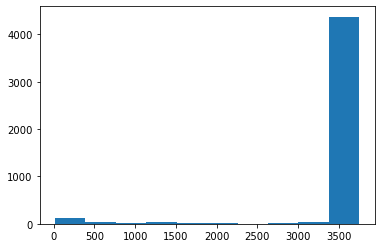

In [5]:
plt.hist(Sizes)

(array([ 67., 144., 344., 771., 275., 149.,  37.,  17.,  12.,  10.,  14.,
          4.,   9.,   2.,  13.,   1.,   2.,   1.,   2.,   7.,   2.,   0.,
          4.,   0.,  12.,   5.,   4.,   4.,   0.,   4.,   2.,  13.,  10.,
          4.,   4.,   3.,   5.,   9.,   9.,   3.,   4.,   3.,   6.,   2.,
          4.,   5.,   1.,   0.,   0.,   1.,   6.,   0.,   3.,   1.,   2.,
          1.,   3.,   2.,   0.,   0.,   0.,   0.,   5.,   3.,   2.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   3.,   5.,   6.,  33.,  25.,
         43.,  48., 125., 348., 601., 526., 300., 265., 113.,  25.,  11.,
          5.,   0.,  15.,  14.,  28.,  28.,  21.,  19.,  17.,   6.,   7.,
          2.]),
 array([ 0.1  ,  0.394,  0.688,  0.982,  1.276,  1.57 ,  1.864,  2.158,
         2.452,  2.746,  3.04 ,  3.334,  3.628,  3.922,  4.216,  4.51 ,
         4.804,  5.098,  5.392,  5.686,  5.98 ,  6.274,  6.568,  6.862,
         7.156,  7.45 ,  7.744,  8.038,  8.332,  8.626,  8.92 ,  9.214,
         9.508,  9.802, 10.096

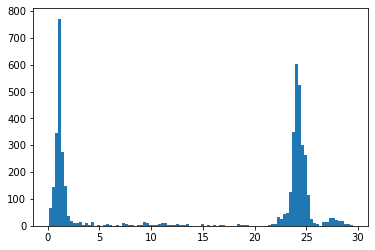

In [6]:
plt.hist(Divergences, bins=100)

/home/mark/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

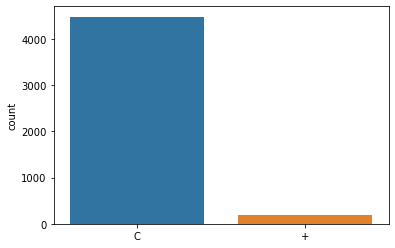

In [7]:
sns.countplot(Orientations)

<AxesSubplot:>

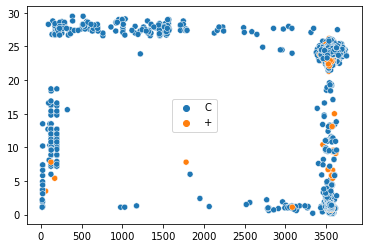

In [8]:
sns.scatterplot(x=Sizes, y=Divergences, hue=Orientations)

In [9]:
tempDF = pd.DataFrame(data=Everything, columns=['Coordinates', 'Real_Coordinate', 'DYZ1_Block','Sizes','Divergences','Orentations'])
tempDF

,Coordinates,Real_Coordinate,DYZ1_Block,Sizes,Divergences,Orentations
0,chrY:27617733-28660072,chrY:27617736-27618084,0,348,27.2,C
1,chrY:27617733-28660072,chrY:27618144-27620734,0,2590,27.2,C
2,chrY:27617733-28660072,chrY:27620351-27620912,0,561,28.7,C
3,chrY:27617733-28660072,chrY:27620959-27621215,0,256,28.7,C
4,chrY:27617733-28660072,chrY:27622090-27622850,0,760,26.8,C
...,...,...,...,...,...,...
4669,chrY:61714602-62001872,chrY:61990059-61993578,42,3519,23.7,C
4670,chrY:61714602-62001872,chrY:61991358-61994854,42,3496,3.2,C
4671,chrY:61714602-62001872,chrY:61993850-61997364,42,3514,23.3,C
4672,chrY:61714602-62001872,chrY:61994855-61998416,42,3561,3.5,C


In [10]:
colors=[]
for divergence in tempDF['Divergences']:
    if divergence < 5:
        colors.append('navyblue')
        
    elif divergence >= 5 and divergence <= 20:
        colors.append('purple')
        
    elif divergence >= 20 and divergence <= 25:
        colors.append('green')
        
    else:
        colors.append('red')


In [11]:
tempDF['colors'] = colors
DYZ1DF = tempDF.copy()
DYZ1DF

,Coordinates,Real_Coordinate,DYZ1_Block,Sizes,Divergences,Orentations,colors
0,chrY:27617733-28660072,chrY:27617736-27618084,0,348,27.2,C,red
1,chrY:27617733-28660072,chrY:27618144-27620734,0,2590,27.2,C,red
2,chrY:27617733-28660072,chrY:27620351-27620912,0,561,28.7,C,red
3,chrY:27617733-28660072,chrY:27620959-27621215,0,256,28.7,C,red
4,chrY:27617733-28660072,chrY:27622090-27622850,0,760,26.8,C,red
...,...,...,...,...,...,...,...
4669,chrY:61714602-62001872,chrY:61990059-61993578,42,3519,23.7,C,green
4670,chrY:61714602-62001872,chrY:61991358-61994854,42,3496,3.2,C,navyblue
4671,chrY:61714602-62001872,chrY:61993850-61997364,42,3514,23.3,C,green
4672,chrY:61714602-62001872,chrY:61994855-61998416,42,3561,3.5,C,navyblue


In [13]:
import collections
print(collections.Counter(DYZ1DF['DYZ1_Block']))

Counter({3: 518, 0: 362, 24: 240, 18: 239, 33: 174, 38: 172, 32: 169, 5: 138, 4: 135, 7: 135, 29: 134, 41: 125, 23: 115, 28: 113, 17: 111, 12: 110, 1: 107, 11: 106, 14: 106, 30: 103, 31: 101, 10: 100, 25: 92, 40: 84, 34: 76, 39: 74, 35: 71, 6: 68, 16: 68, 9: 67, 27: 67, 13: 63, 21: 61, 42: 59, 22: 39, 20: 35, 26: 35, 15: 34, 19: 33, 2: 27, 8: 3, 36: 3, 37: 2})


In [14]:
DYZ1DF[DYZ1DF['DYZ1_Block']==37]

,Coordinates,Real_Coordinate,DYZ1_Block,Sizes,Divergences,Orentations,colors
4158,chrY:58542735-58708818,chrY:58543640-58543762,37,122,16.9,C,purple
4159,chrY:58542735-58708818,chrY:58543993-58544007,37,14,1.1,C,navyblue


In [12]:
################################################################################################################

## Draw

In [12]:
import turtle

In [13]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("T2T Yq Heterochromatin Spacer (DYZ1) Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(DYZ1DF['DYZ1_Block']))[29:]):
            
    turtle.color("black")
    turtle.forward(75)    

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" DYZ1 Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = DYZ1DF[DYZ1DF['DYZ1_Block']==key].copy() 
    for item in tempDF.index:
        
        if DYZ1DF.at[item,'Orentations'] == 'C':
            turtle.color(DYZ1DF.at[item,'colors'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(DYZ1DF.at[item,'Sizes']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(DYZ1DF.at[item,'Sizes']/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif DYZ1DF.at[item,'Orentations'] == '+':
            turtle.color(DYZ1DF.at[item,'colors'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(DYZ1DF.at[item,'Sizes']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(DYZ1DF.at[item,'Sizes']/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


  0%|                                                    | 0/14 [00:02<?, ?it/s]


Terminator: 

In [86]:
from PIL import Image

In [87]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [88]:
ts = turtle.getscreen()
#save_as_png(ts.getcanvas(),"/home/mark/Desktop/T2T_part3_DYZ1.png")

In [14]:
turtle.bye()

## HMMER output

In [13]:
Sizes=[]
Divergences=[]
Orientations=[]
Everything = []
with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/repeatmaskerHMMERout/T2T_DYZ1_HMMERBlocks.fasta.out') as f:
    Lines = f.readlines()
    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if 'DYZ1_Yq' in goodLine and "*" not in goodLine:
            blocknumber = 'NOT_Yq_Heterochromatin'
            for blockcoordinate, blocknum in headerDict.items():
                #print(blockcoordinate)
                if int(goodLine.split(" ")[4].split(":")[1].split("-")[0])>= int(blockcoordinate.split(":")[1].split("-")[0]) and int(goodLine.split(" ")[4].split(":")[1].split("-")[1])<= int(blockcoordinate.split(":")[1].split("-")[1]):
                    blocknumber=blocknum
                else:
                    continue
            Everything.append([str(goodLine.split(" ")[4]), blocknumber, int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]),float(goodLine.split(" ")[1]),str(goodLine.split(" ")[8])])
            Sizes.append(int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]))
            Divergences.append(float(goodLine.split(" ")[1]))
            Orientations.append(str(goodLine.split(" ")[8]))
        else:
            continue

100%|██████████████████████████████████| 10145/10145 [00:00<00:00, 21925.42it/s]


In [14]:
Everything = {}
with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/repeatmaskerHMMERout/T2T_DYZ1_HMMERBlocks.fasta.out') as f:
    Lines = f.readlines()
    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        if 'DYZ1_Yq' in goodLine and "*" not in goodLine:
            
            if str(goodLine.split(" ")[4]) in Everything.keys():
                blocknumber = 'NOT_Yq_Heterochromatin'
                for blockcoordinate, blocknum in headerDict.items():
                    #print(blockcoordinate)
                    if int(goodLine.split(" ")[4].split(":")[1].split("-")[0])>= int(blockcoordinate.split(":")[1].split("-")[0]) and int(goodLine.split(" ")[4].split(":")[1].split("-")[1])<= int(blockcoordinate.split(":")[1].split("-")[1]):
                        blocknumber=blocknum
                    else:
                        continue
                        
                Everything[str(goodLine.split(" ")[4])]['Sizes'].append(int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]))
                Everything[str(goodLine.split(" ")[4])]['Block'].append(blocknumber)
                Everything[str(goodLine.split(" ")[4])]['Divergences'].append(float(goodLine.split(" ")[1]))
                Everything[str(goodLine.split(" ")[4])]['Orientations'].append(str(goodLine.split(" ")[8]))
                
            else:
                Everything[str(goodLine.split(" ")[4])]={'Sizes':[], 'Block':[], 'Divergences':[], 'Orientations':[]}
                blocknumber = 'NOT_Yq_Heterochromatin'
                for blockcoordinate, blocknum in headerDict.items():
                    #print(blockcoordinate)
                    if int(goodLine.split(" ")[4].split(":")[1].split("-")[0])>= int(blockcoordinate.split(":")[1].split("-")[0]) and int(goodLine.split(" ")[4].split(":")[1].split("-")[1])<= int(blockcoordinate.split(":")[1].split("-")[1]):
                        blocknumber=blocknum
                    else:
                        continue
                        
                Everything[str(goodLine.split(" ")[4])]['Sizes'].append(int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]))
                Everything[str(goodLine.split(" ")[4])]['Block'].append(blocknumber)
                Everything[str(goodLine.split(" ")[4])]['Divergences'].append(float(goodLine.split(" ")[1]))
                Everything[str(goodLine.split(" ")[4])]['Orientations'].append(str(goodLine.split(" ")[8]))
                
        else:
            try:
                if 'chrY' in str(goodLine.split(" ")[4]):
                    Everything[str(goodLine.split(" ")[4])]={'Sizes':[], 'Block':[], 'Divergences':[], 'Orientations':[]}
                    Everything[str(goodLine.split(" ")[4])]['Sizes'].append(int(goodLine.split(" ")[6])-int(goodLine.split(" ")[5]))
                else:
                    continue
            except:
                continue

100%|██████████████████████████████████| 10145/10145 [00:00<00:00, 19050.36it/s]


In [16]:
finalHMMERList = []
for key in Everything.keys():
    blockList = []
    DYZ1_Size=0
    Divergence=0.0
    flag = 0
    if len(Everything[key]['Divergences']) == 0:
        continue
    else:
        for block in Everything[key]['Block']:
            if 'NOT_Yq_Heterochromatin' in str(block):
                flag+=1
            else:
                blockList.append(block)

        if flag == 0:
            for size in Everything[key]['Sizes']:
                DYZ1_Size+=size

            Divergence += np.mean(Everything[key]['Divergences'])

            finalHMMERList.append([key, max(set(blockList), key=blockList.count), DYZ1_Size, Divergence,max(set(Everything[key]['Orientations']), key=Everything[key]['Orientations'].count)])

        else:
            continue
        

In [17]:
finalHMMERList

[['chrY:27618660-27619169', 0, 507, 28.7, 'C'],
 ['chrY:27619161-27621246', 0, 333, 27.6, 'C'],
 ['chrY:27622289-27623435', 0, 583, 27.3, 'C'],
 ['chrY:27623403-27624154', 0, 98, 28.4, 'C'],
 ['chrY:27625096-27626141', 0, 588, 29.2, 'C'],
 ['chrY:27626102-27626853', 0, 98, 28.4, 'C'],
 ['chrY:27626988-27627622', 0, 295, 23.1, 'C'],
 ['chrY:27628127-27629265', 0, 584, 28.1, 'C'],
 ['chrY:27629179-27629970', 0, 787, 29.8, 'C'],
 ['chrY:27631250-27632396', 0, 583, 27.3, 'C'],
 ['chrY:27632365-27633115', 0, 100, 27.0, 'C'],
 ['chrY:27633250-27633873', 0, 294, 22.8, 'C'],
 ['chrY:27634379-27635514', 0, 580, 27.6, 'C'],
 ['chrY:27636372-27637008', 0, 297, 23.6, 'C'],
 ['chrY:27637511-27639607', 0, 1530, 29.0, 'C'],
 ['chrY:27639512-27640152', 0, 325, 23.1, 'C'],
 ['chrY:27640140-27641618', 0, 420, 26.2, 'C'],
 ['chrY:27641584-27642273', 0, 689, 26.9, 'C'],
 ['chrY:27643261-27643726', 0, 453, 28.0, 'C'],
 ['chrY:27643778-27644910', 0, 584, 29.3, 'C'],
 ['chrY:27644879-27645629', 0, 100, 27.0,

In [18]:
HMMER_DF = pd.DataFrame(data=finalHMMERList, columns=['HMMER_Coordinate','DYZ1_Block','Sizes','Divergences','Orientations'])

In [19]:
HMMER_Yq = HMMER_DF[HMMER_DF['DYZ1_Block']!='NOT_Yq_Heterochromatin'].copy()

In [ ]:
 27618653-27619174 

In [ ]:
 27619158 -27621249 

In [ ]:
>chrY:27618660-27619169
GAATGGAATTGAATGGAGTGGAGTGGAATGGAATGGAATGGAAAGGAATGGAATTGAACA
AAATGGAGTGTAGTAGAATGGAGTGGATTGGAGTGGAGTGCAGGGGAGTGCAGTGGAATG
AAGAGGAGTGTAGTTGAATGGAATGGAATGTATGGAATGTCCTGGAATAGAATGGATAAG
AATGGAATGGAATGGAATCGCATGGAATTGAATAGAATCAAATCGAATTGAATAGAATCT
AATGGAAAAAATGGAGTCAAATGGAATCGAATGGCATAGAATCGAACGGTTTTGAATGTC
AGTGAATGGAAACGAATGGAATGCGATGAAGTGGAGCGCAGTGGAGTGGAAAGGAGTGCA
ATGGAATAGGGTGGAACTGAATTTAATGGGACAGAGTGGATTGGAGTGGACTGGAGTGGA
ATGGAATGGGAAGGAATGGGATTGGAAGGAGTGGCGTGCAGTGGAGTGGAGTGGCATGGA
GTGGAGTGGAGTGGAATGGAGTGGAATGGA
>chrY:27619161-27621246
TGGAATGGAATGGAGTGGAATGGAGTGGATTGGAATGGAATGGAGTGCAGAGGAATGGAA
TGGAATGGTATAGAGTGGACAGGAATGGAGTGGAGCGGATTGGAATGGAATGGAATGGAA
CTGAATGGACTGGAATGGAATGGAATAGAATGGAATCACAGGGAATCAAATTGGATTGAA
TCGAATCGAATGGAAAAAATGAAATCAAATGAAATTGAATGGAATCGAAATGAATGTAAA
CAATGGAATCCAATGGAATCCAATGGAATCGAATCAAATGGTTTTGAATGGCGTAAAATG
AGATCGCAAGGAAGGCAGTGAATTGGAGTGGAGTGGAATAGAGAGGAATGAATTGGAATG
GAGTGGAGTGGAATGGAGAGGATTCCAGTGGAGTGGAGTGGATTGGATTTTAATGGAATG
GAATAGACTGGATTGGAGTGGTGTAGAGTGCAGTGGATTGGAGTGGAGAGGAATGGAGTG
GAGTGAAGTCGAGTTGAGTGGAATGGAATGGAGTGGAGCAGAGTGGAATGCAAAAGAATG
AAGTGGATTGGTGTGGAATGGACTGGCGTGGAATGGAGTGGAATAGAATGGAATGGAATC
GCATGGAAGGATATCAAATCAAATGGAATCGAAGGAAAATTATGAATCCAATGGAATCGA
AAGGATTCCAAAGGAACGGATTCGAAAGGCCTTTAATGGAATGGAAAGGTATGCAGTGAA
GTGGAGTGGAGTGGATTGTTTTAGAGTGAAATGGGGCGGATTGGAACACTATGTGCTGGA
GTGGAGTGTAGTGGATCGGAGTGGAGTGCCGTGGAGTGGACTAGAGTGGGGTGGAGTGGA
GTGCATTGGAGTGGAATGGAGTGGAGTGGGGTGGAATGGAATGGAATGGCATCAAATCGC
ATGGTAATGAATCAAATGGAATCAAATGGAATGAAATAATGGAATCGAAGGCAAACGAAT
GGAATCGAATTGCACTGATTCTACTGACTTCGAAGAAAATGAAATGAAATGCGGTGAAGT
GGAGTGGAGTGGAATGTATTAGGGTGGAATGGAATTGAATGGTGTGGAGTGGAGTGGAGT
GCCCAGGAGTGGAATGGGAAGAAATGGAATTGAACGGAGTGGAGTGGAGTGGAATGGAGG
GTAATGGAGTGGAATGGAGTGGAGTGGAGTAGAGTGGAATGGGTTGGAGTGGAATGCAGA
GGACAGGAGTGGAGTGTGGTGGACTGGAGTGGAGTGGAGTTGAGTGGAGTGGATTGGATT
GAAATAGAGCGGAGCAGAGTGGAATGGAATTGAATCACATGGTACTGAATCAAATCGAAT
GGAATTAAATCGAATGAAAAAACGGAATCAAAAGCAAACGAATGGAGTCAAACCACATTG
GTTAGACTGACATCGAATAATATCAAAAGAAATGTGGTGAAGTGGAGTGGAGTGTAATGA
AATGGGGTGGAATGAAATTGAATGGAGTGGAGTGGAGTGGAGTCTACTGGAGTGGAATGG
AATGGAATGGAAAGGAATGGAATAGAATGGAGTGAAGGGCAGTGCAGTGAAATGGAGTGG
AAAGGAATGGAATGGAAAGAATTGAATCAAATGGAATCGAAGTGAATCGAATCTAATGAA
ATTGAACGCAAAAAATGGAATGAGTAGAATCGAAAAAGATGGATTCAAATGGCAACAAAT
AAAATTGAATGGAATGCGGTGAGGTGGAGGGGATTGGAATGGAGTTGAATGGAATGGGGT
GTAATTGAATTGAATGGAGTGGAGTGGAGTGAACTGGAGTGGAATGGAATGGAATGGGCC
GGCATGGAATTGAAAGGCGTGGACTGGAGTGGAGTTGAGATGAGTGGAATGGAGTAGGGT
GGATTGTGGTGGAGAATATTGGAAAAGAGTGGAGTGGAATGGAATGGAATGGAGTGGAGT
GGAATGGAATGGAATGGAATTGAGTGAAGTGGAGTGTAGTGGAATGGAGAGTAATGGAGT
GGAGTGGACTGGAGTGGAGTAGATTGCAGTGCATTGGACTGTAGGGGATAGAAGTGGCTT
GGAGTCCATAGGAGTGGAGTGGAATGGAATGGAATGGAGTGGAATG

In [20]:
HMMER_Yq

,HMMER_Coordinate,DYZ1_Block,Sizes,Divergences,Orientations
0,chrY:27618660-27619169,0,507,28.7,C
1,chrY:27619161-27621246,0,333,27.6,C
2,chrY:27622289-27623435,0,583,27.3,C
3,chrY:27623403-27624154,0,98,28.4,C
4,chrY:27625096-27626141,0,588,29.2,C
...,...,...,...,...,...
6047,chrY:61994855-61998397,42,3542,3.4,C
6048,chrY:62061427-62061904,44,472,16.9,+
6049,chrY:62061829-62062284,44,451,22.6,+
6050,chrY:62062221-62062991,44,766,21.2,+


In [21]:
print(len(set(HMMER_Yq['HMMER_Coordinate'])))

6052


(array([1.760e+02, 1.300e+02, 2.900e+01, 1.040e+02, 8.400e+01, 8.500e+01,
        8.300e+01, 1.240e+02, 5.236e+03, 1.000e+00]),
 array([  70.,  480.,  890., 1300., 1710., 2120., 2530., 2940., 3350.,
        3760., 4170.]),
 <BarContainer object of 10 artists>)

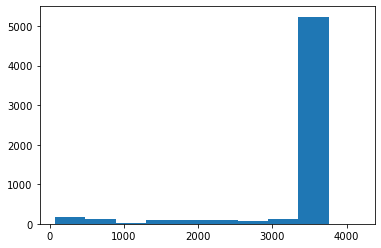

In [22]:
plt.hist(HMMER_Yq['Sizes'])

(array([2.280e+02, 3.610e+02, 1.085e+03, 2.050e+03, 8.620e+02, 6.610e+02,
        2.110e+02, 9.000e+01, 9.200e+01, 4.900e+01, 1.800e+01, 1.200e+01,
        7.000e+00, 2.200e+01, 3.300e+01, 6.000e+00, 2.000e+00, 9.000e+00,
        1.300e+01, 1.100e+01, 5.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 6.000e+00, 1.200e+01, 0.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 5.000e+0

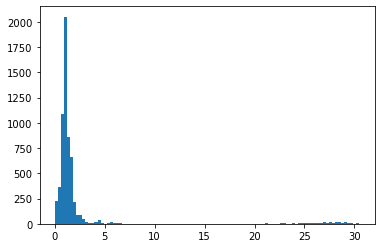

In [23]:
plt.hist(HMMER_Yq['Divergences'], bins=100)

<AxesSubplot:xlabel='Sizes', ylabel='Divergences'>

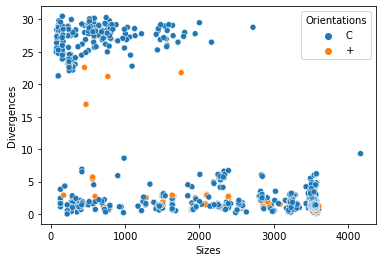

In [24]:
sns.scatterplot(data=HMMER_Yq, x='Sizes', y='Divergences', hue='Orientations')

In [34]:
HMMER_Yq

,HMMER_Coordinate,DYZ1_Block,Sizes,Divergences,Orientations
0,chrY:27618660-27619169,0,507,28.7,C
1,chrY:27619161-27621246,0,333,27.6,C
2,chrY:27622289-27623435,0,583,27.3,C
3,chrY:27623403-27624154,0,98,28.4,C
4,chrY:27625096-27626141,0,588,29.2,C
...,...,...,...,...,...
6047,chrY:61994855-61998397,42,3542,3.4,C
6048,chrY:62061427-62061904,44,472,16.9,+
6049,chrY:62061829-62062284,44,451,22.6,+
6050,chrY:62062221-62062991,44,766,21.2,+


In [40]:
Lengths = []
i = 0
while i < len(HMMER_Yq)-1:
    num1 = int(HMMER_Yq.iloc[i]['HMMER_Coordinate'].split("-")[1])
    num2 = int(HMMER_Yq.iloc[i+1]['HMMER_Coordinate'].split("chrY:")[1].split("-")[0])
    
    Lengths.append(float(num2-num1))
    i+=1


In [47]:
#plt.hist([x for x in Lengths if x<10000 ], log=True)

## Compare

In [25]:
HMMER_LARGE = HMMER_Yq[HMMER_Yq['Sizes']>3500].copy()
REPEATMASKER_LARGE = DYZ1DF[DYZ1DF['Sizes']>3500].copy()

In [26]:
#with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/Comparison/RM_Long_LowDivergence.txt', 'a+') as file:
#    
#    for x in REPEATMASKER_LARGE[(REPEATMASKER_LARGE['DYZ1_Block']==0)  &(REPEATMASKER_LARGE['Divergences']<2.0)]['Real_Coordinate']:
#        file.write(str(x)+"\n")
#    file.close()
    

In [112]:
#with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/Comparison/RM_Long_HighDivergence.txt', 'a+') as file:
    
    for x in REPEATMASKER_LARGE[(REPEATMASKER_LARGE['DYZ1_Block']==0)  &(REPEATMASKER_LARGE['Divergences']>20.0)]['Real_Coordinate']:
        file.write(str(x)+"\n")
    file.close()

In [113]:
#with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/Comparison/HMMER_Long_HighDivergence.txt', 'a+') as file:
    
    for x in HMMER_LARGE[(HMMER_LARGE['DYZ1_Block']==0)  &(HMMER_LARGE['Divergences']>20.0)]['HMMER_Coordinate']:
        file.write(str(x)+"\n")
    file.close()

In [114]:
#with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/Comparison/HMMER_Long_LowDivergence.txt', 'a+') as file:
    
    for x in HMMER_LARGE[(HMMER_LARGE['DYZ1_Block']==0)  &(HMMER_LARGE['Divergences']<2.0)]['HMMER_Coordinate']:
        file.write(str(x)+"\n")
    file.close()

In [108]:
HMMER_LARGE[(HMMER_LARGE['DYZ1_Block']==0) &(HMMER_LARGE['Divergences']<2.0)]

,HMMER_Coordinate,DYZ1_Block,Sizes,Divergences,Orientations
252,chrY:27904906-27908431,0,3524,1.6,C
253,chrY:27908433-27911975,0,3542,1.8,C
254,chrY:27911977-27915544,0,3567,1.5,C
255,chrY:27915546-27919073,0,3527,1.4,C
256,chrY:27919075-27922647,0,3572,1.6,C
...,...,...,...,...,...
459,chrY:28627960-28631507,0,3547,1.4,C
460,chrY:28631509-28635051,0,3542,1.5,C
462,chrY:28638540-28642072,0,3532,1.8,C
463,chrY:28642074-28645606,0,3532,1.7,C


In [104]:
for coordinate in HMMER_LARGE['HMMER_Coordinate']:
    if str(coordinate) in [str(x) for x in REPEATMASKER_LARGE['Real_Coordinate']]:
        print(coordinate)
    else:
        continue

In [105]:
for coordinate in REPEATMASKER_LARGE['Real_Coordinate']:
    if str(coordinate) in [str(x) for x in HMMER_LARGE['HMMER_Coordinate']]:
        print(coordinate)
    else:
        continue